In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


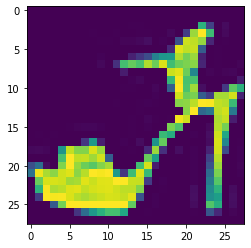

In [3]:
# Show one of the images from the training dataset
plt.imshow(x_train[9])


In [4]:
x_train=x_train.reshape((x_train.shape[0],28,28,1))
x_test=x_test.reshape((x_test.shape[0],28,28,1))

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28, 1) y_train shape: (60000,)


In [0]:
x_train = x_train.astype('float32') / 255
x_test = x_test.astype('float32') / 255

In [0]:
from sklearn.model_selection import train_test_split
x_train,x_valid,y_train,y_valid = train_test_split(x_train,y_train,test_size=0.3, random_state=8)

In [7]:
x_train.shape

(42000, 28, 28, 1)

In [8]:
x_valid.shape

(18000, 28, 28, 1)

In [9]:
model = tf.keras.Sequential()
# Must define the input shape in the first layer of the neural network
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', input_shape=(28,28,1))) 
model.add(tf.keras.layers.MaxPooling2D(pool_size=2))
model.add(tf.keras.layers.Dropout(0.3))
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dropout(0.5))
model.add(tf.keras.layers.Dense(10, activation='softmax'))
# Take a look at the model summary
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 28, 28, 64)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
dropout (Dropout)            (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 14, 14, 64)        16448     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 7, 7, 64)          0         
_________________________________________

In [0]:
model.compile(loss='sparse_categorical_crossentropy',
             optimizer='adam',
             metrics=['accuracy'])

In [11]:
model.fit(x_train,
         y_train,
         batch_size=64,
         epochs=10,
         validation_data=(x_valid, y_valid))

Train on 42000 samples, validate on 18000 samples
Epoch 1/10
42000/42000 [==============================] - 76s 2ms/sample - loss: 0.6003 - acc: 0.7813 - val_loss: 0.3926 - val_acc: 0.8568
Epoch 2/10
42000/42000 [==============================] - 75s 2ms/sample - loss: 0.4140 - acc: 0.8506 - val_loss: 0.3205 - val_acc: 0.8836
Epoch 3/10
42000/42000 [==============================] - 75s 2ms/sample - loss: 0.3659 - acc: 0.8680 - val_loss: 0.2978 - val_acc: 0.8912
Epoch 4/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.3390 - acc: 0.8771 - val_loss: 0.2813 - val_acc: 0.8997
Epoch 5/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.3188 - acc: 0.8843 - val_loss: 0.2687 - val_acc: 0.9002
Epoch 6/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.2999 - acc: 0.8900 - val_loss: 0.2573 - val_acc: 0.9045
Epoch 7/10
42000/42000 [==============================] - 74s 2ms/sample - loss: 0.2885 - acc: 0.8938 - val_loss: 0.

In [0]:
x_test = x_test.reshape((x_test.shape[0],28,28,1))

In [13]:
# Evaluate the model on test set
score = model.evaluate(x_test, y_test, verbose=0)
# Print test accuracy
print('\n', 'Test accuracy:', score[1])


 Test accuracy: 0.9128
